In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from radar import radar2, norm_df, radar
import pandas as pd

In [2]:
data = pd.read_hdf('combined_maf_dataframe.hdf')

In [3]:
data.columns

Index(['runName', 'version', 'parallax_best18k', 'properMotion_best18k',
       'fO_fONv MedianNvis', 'fO_fOArea', 'median_coadd_u', 'median_coadd_g',
       'median_coadd_r', 'median_coadd_i', 'median_coadd_z', 'median_coadd_y',
       'SNIa_PrePeak_Mean', 'Fast Microlensing_Mean', 'Slow Microlensing_Mean',
       'KN_PrePeak_Mean', 'TDEsPopMetric_Mean',
       'GalaxyCountsMetric_extended_N Galaxies (all)',
       'Nstars_no_crowding_Total N Stars, no crowding', 'DD:ELAISS1,u',
       'DD:XMM-LSS,u', 'DD:ECDFS,u', 'DD:COSMOS,u', 'DD:EDFS,u', 'DD:EDFSa,u',
       'DD:EDFSb,u', 'DD:ELAISS1,g', 'DD:XMM-LSS,g', 'DD:ECDFS,g',
       'DD:COSMOS,g', 'DD:EDFS,g', 'DD:EDFSa,g', 'DD:EDFSb,g', 'DD:ELAISS1,r',
       'DD:XMM-LSS,r', 'DD:ECDFS,r', 'DD:COSMOS,r', 'DD:EDFS,r', 'DD:EDFSa,r',
       'DD:EDFSb,r', 'DD:ELAISS1,i', 'DD:XMM-LSS,i', 'DD:ECDFS,i',
       'DD:COSMOS,i', 'DD:EDFS,i', 'DD:EDFSa,i', 'DD:EDFSb,i', 'DD:ELAISS1,z',
       'DD:XMM-LSS,z', 'DD:ECDFS,z', 'DD:COSMOS,z', 'DD:EDFS,z', 

In [4]:
cols = ['runName', 'parallax_best18k', 'properMotion_best18k', 'fO_fONv MedianNvis', 'SNIa_PrePeak_Mean',
        'Fast Microlensing_Mean', 'GalaxyCountsMetric_extended_N Galaxies (all)',
        'Nstars_no_crowding_Total N Stars, no crowding',
        '3 pairs in 15 nights detection loss NEO H=16.0',
        '3 pairs in 30 nights detection loss NEO H=22.0',
       '3 pairs in 15 nights detection loss TNO H=4.0']

mag_cols = ['runName', 'median_coadd_u', 'median_coadd_g',
       'median_coadd_r', 'median_coadd_i', 'median_coadd_z', 'median_coadd_y']


name_mapper = {'runName': 'runName', 'parallax_best18k': 'Parallax', 'properMotion_best18k': 'Proper Motion',
       'fO_fONv MedianNvis': 'fO N', 'SNIa_PrePeak_Mean': 'SNeIa', 'Fast Microlensing_Mean': 'Fast Micro L',
       'Slow Microlensing_Mean': 'Slow Micro L',
       'GalaxyCountsMetric_extended_N Galaxies (all)': 'N Gals',
       'Nstars_no_crowding_Total N Stars, no crowding': 'N Stars',
       '3 pairs in 15 nights detection loss NEO H=16.0': 'NEO, bright',
               '3 pairs in 30 nights detection loss NEO H=22.0':'NEO, faint',
        '3 pairs in 15 nights detection loss TNO H=4.0':' TNO'}

mag_name_mapper = {'runName': 'runName', 'median_coadd_u': 'u', 'median_coadd_g': 'g',
       'median_coadd_r': 'r', 'median_coadd_i': 'i', 'median_coadd_z': 'z', 'median_coadd_y': 'y'}

In [5]:
runs = ['baseline_nexp1_v1.6', 'even_filters_alt_g_v1.6',
        'even_filters_altv1.6', 'even_filters_g_v1.6', 'even_filtersv1.6']

In [6]:
data_normed = norm_df(data, runs, cols, invert_cols=['parallax_best18k', 'properMotion_best18k'])
data_normed = data_normed.rename(columns=name_mapper)

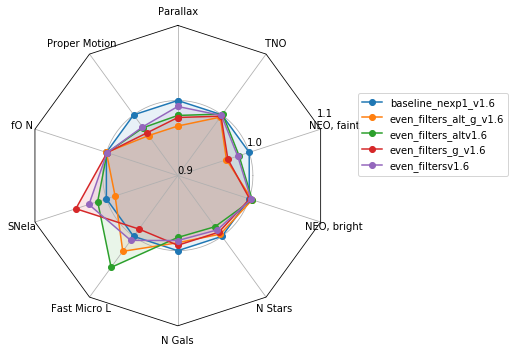

In [7]:
fig, ax = radar(data_normed, legend=True, rgrids=[0.9, 1.0, 1.1])
fig.tight_layout()
fig.savefig('radar_plots/even_filt_radar.pdf')

In [8]:
runs = ['baseline_nexp1_v1.6', 'rolling_fpo_2nslice0.8_v1.6',
 'rolling_fpo_2nslice0.9_v1.6',
 'rolling_fpo_2nslice1.0_v1.6',
 'rolling_fpo_3nslice0.8_v1.6',
 'rolling_fpo_3nslice0.9_v1.6',
 'rolling_fpo_3nslice1.0_v1.6',
 'rolling_fpo_6nslice0.8_v1.6',
 'rolling_fpo_6nslice0.9_v1.6',
 'rolling_fpo_6nslice1.0_v1.6']

In [9]:
data_normed = norm_df(data, runs, cols, invert_cols=['parallax_best18k', 'properMotion_best18k'])
data_normed = data_normed.rename(columns=name_mapper)

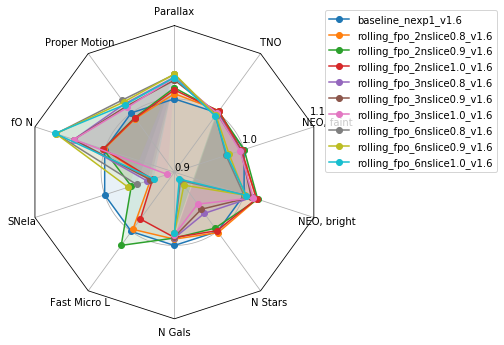

In [10]:
fig, ax = radar(data_normed, legend=True, rgrids=[0.9, 1.0, 1.1], figsize=(8,5))
fig.tight_layout()
fig.savefig('radar_plots/rolling_radar.pdf')

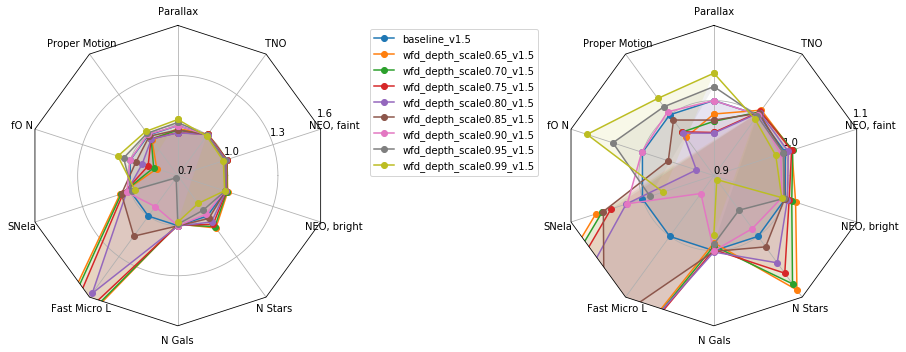

In [11]:
runs = ['baseline_v1.5', 'wfd_depth_scale0.65_v1.5',
 'wfd_depth_scale0.70_v1.5',
 'wfd_depth_scale0.75_v1.5',
 'wfd_depth_scale0.80_v1.5',
 'wfd_depth_scale0.85_v1.5',
 'wfd_depth_scale0.90_v1.5',
 'wfd_depth_scale0.95_v1.5',
 'wfd_depth_scale0.99_v1.5']
data_normed = norm_df(data, runs, cols, norm_run='baseline_v1.5',
                      invert_cols=['parallax_best18k', 'properMotion_best18k'])
data_normed = data_normed.rename(columns=name_mapper)

fig, ax = radar2(data_normed, legend=True, rgrids=[[0.7, 1.0, 1.3, 1.6], [0.9, 1.0, 1.1]])
fig.tight_layout()
fig.savefig('radar_plots/wfd_depth_radar.pdf')

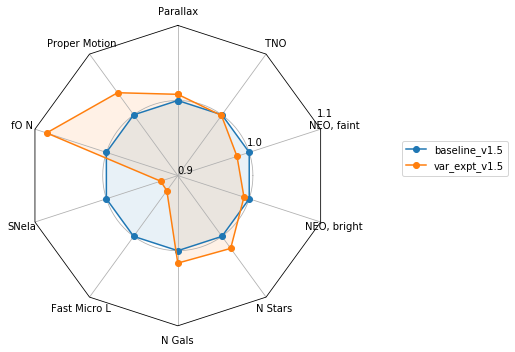

In [12]:
runs = ['baseline_v1.5', 'var_expt_v1.5']
data_normed = norm_df(data, runs, cols, norm_run='baseline_v1.5',
                      invert_cols=['parallax_best18k', 'properMotion_best18k'])
data_normed = data_normed.rename(columns=name_mapper)

fig, ax = radar(data_normed, legend=True, rgrids=[0.9, 1.0, 1.1])
fig.tight_layout()
fig.savefig('radar_plots/var_exp_radar.pdf')

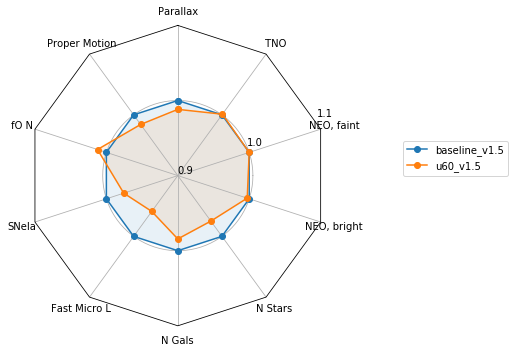

In [13]:
runs = ['baseline_v1.5', 'u60_v1.5']
data_normed = norm_df(data, runs, cols, norm_run='baseline_v1.5',
                      invert_cols=['parallax_best18k', 'properMotion_best18k'])
data_normed = data_normed.rename(columns=name_mapper)

fig, ax = radar(data_normed, legend=True, rgrids=[0.9, 1.0, 1.1])
fig.tight_layout()
fig.savefig('radar_plots/u60_radar.pdf')

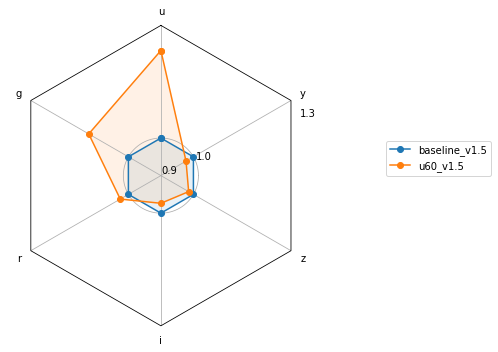

In [14]:

runs = ['baseline_v1.5', 'u60_v1.5']
data_normed = norm_df(data, runs, mag_cols, norm_run='baseline_v1.5',
                      invert_cols=None, mag_cols='all')
data_normed = data_normed.rename(columns=mag_name_mapper)

fig, ax = radar(data_normed, legend=True, rgrids=[0.90, 1.0, 1.3])
fig.tight_layout()
fig.savefig('radar_plots/u60_mags_radar.pdf')

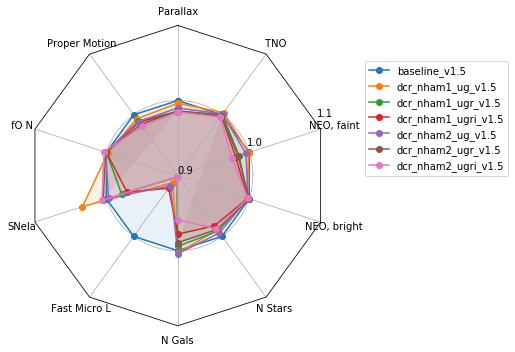

In [15]:
runs = ['baseline_v1.5', 'dcr_nham1_ug_v1.5',
 'dcr_nham1_ugr_v1.5',
 'dcr_nham1_ugri_v1.5',
 'dcr_nham2_ug_v1.5',
 'dcr_nham2_ugr_v1.5',
 'dcr_nham2_ugri_v1.5']
data_normed = norm_df(data, runs, cols, norm_run='baseline_v1.5',
                      invert_cols=['parallax_best18k', 'properMotion_best18k'])
data_normed = data_normed.rename(columns=name_mapper)

fig, ax = radar(data_normed, legend=True, rgrids=[0.90, 1.0, 1.1])
fig.tight_layout()
fig.savefig('radar_plots/dcr_radar.pdf')

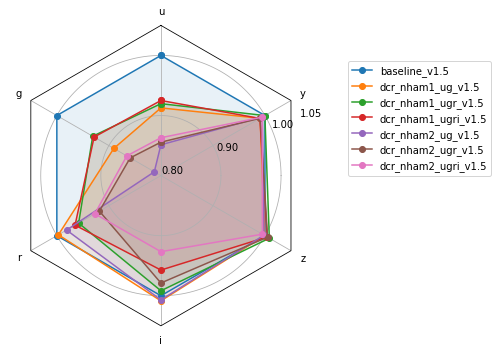

In [16]:
data_normed = norm_df(data, runs, mag_cols, norm_run='baseline_v1.5',
                      invert_cols=None, mag_cols='all')
data_normed = data_normed.rename(columns=mag_name_mapper)

fig, ax = radar(data_normed, legend=True, rgrids=[0.80, 0.9, 1.0, 1.05])
fig.tight_layout()
fig.savefig('radar_plots/dcr_mags_radar.pdf')

In [17]:
[name for name in data['runName'] if 'dcr' in name]

['dcr_nham1_v1.4',
 'dcr_nham2_v1.4',
 'dcr_nham3_v1.4',
 'dcr_nham4_v1.4',
 'dcr_nham5_v1.4',
 'dcr_nham1_ug_v1.5',
 'dcr_nham1_ugr_v1.5',
 'dcr_nham1_ugri_v1.5',
 'dcr_nham2_ug_v1.5',
 'dcr_nham2_ugr_v1.5',
 'dcr_nham2_ugri_v1.5']

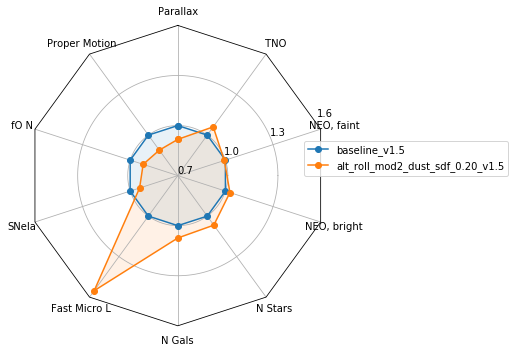

In [18]:
runs = ['baseline_v1.5', 'alt_roll_mod2_dust_sdf_0.20_v1.5']
data_normed = norm_df(data, runs, cols, norm_run='baseline_v1.5',
                      invert_cols=['parallax_best18k', 'properMotion_best18k'])
data_normed = data_normed.rename(columns=name_mapper)

fig, ax = radar(data_normed, legend=True)
fig.tight_layout()
fig.savefig('radar_plots/alt_dust_radar.pdf')

In [19]:
[name for name in data['runName'] if 'bulge' in name]

['bulges_bs_v1.4',
 'bulges_bulge_wfd_v1.4',
 'bulges_cadence_bs_v1.4',
 'bulges_cadence_bulge_wfd_v1.4',
 'bulges_cadence_i_heavy_v1.4',
 'bulges_i_heavy_v1.4',
 'bulges_bs_v1.5',
 'bulges_bulge_wfd_v1.5',
 'bulges_cadence_bs_v1.5',
 'bulges_cadence_bulge_wfd_v1.5',
 'bulges_cadence_i_heavy_v1.5',
 'bulges_i_heavy_v1.5']

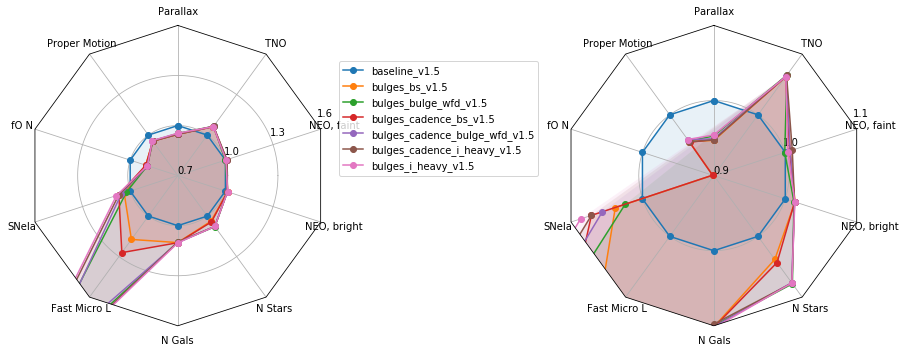

In [20]:
runs = ['baseline_v1.5', 'bulges_bs_v1.5',
 'bulges_bulge_wfd_v1.5',
 'bulges_cadence_bs_v1.5',
 'bulges_cadence_bulge_wfd_v1.5',
 'bulges_cadence_i_heavy_v1.5',
 'bulges_i_heavy_v1.5']
data_normed = norm_df(data, runs, cols, norm_run='baseline_v1.5',
                      invert_cols=['parallax_best18k', 'properMotion_best18k'])
data_normed = data_normed.rename(columns=name_mapper)

fig, ax = radar2(data_normed, legend=True)
fig.tight_layout()
fig.savefig('radar_plots/bulge_radar.pdf')

## Let's try making some DDF plots

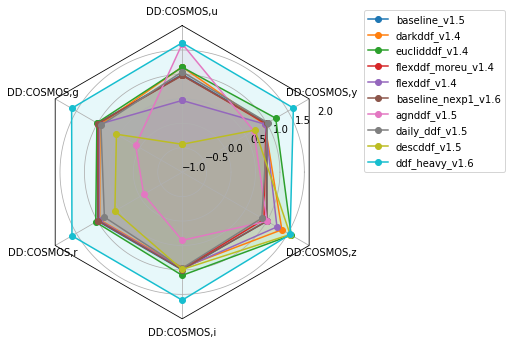

In [21]:
runs = ['baseline_v1.5', 
 'darkddf_v1.4',
 'euclidddf_v1.4',
 'flexddf_moreu_v1.4',
 'flexddf_v1.4', 'baseline_nexp1_v1.6',
 'agnddf_v1.5',
 'daily_ddf_v1.5',
 'descddf_v1.5','ddf_heavy_v1.6']
ddf_cols = ['runName', 'DD:COSMOS,u',
 'DD:COSMOS,g',
 'DD:COSMOS,r',
 'DD:COSMOS,i',
 'DD:COSMOS,z',
 'DD:COSMOS,y']
data_normed = norm_df(data, runs, ddf_cols, norm_run='baseline_v1.5', mag_cols='all')
data_normed = data_normed.rename(columns=name_mapper)

fig, ax = radar(data_normed, legend=True, rgrids=[-1, -0.5, 0, 0.5, 1., 1.5, 2.])
fig.tight_layout()
fig.savefig('radar_plots/ddf1_radar.pdf')

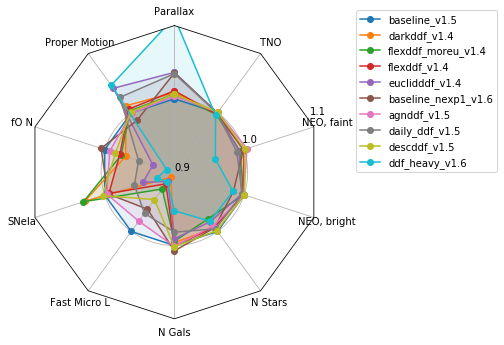

In [22]:
runs = ['baseline_v1.5', 
 'darkddf_v1.4','flexddf_moreu_v1.4',
 'flexddf_v1.4',
 'euclidddf_v1.4',
 'baseline_nexp1_v1.6',
 'agnddf_v1.5',
 'daily_ddf_v1.5',
 'descddf_v1.5','ddf_heavy_v1.6']
data_normed = norm_df(data, runs, cols, norm_run='baseline_v1.5')
data_normed = data_normed.rename(columns=name_mapper)

fig, ax = radar(data_normed, legend=True, rgrids=[0.9,1., 1.1])
fig.tight_layout()
fig.savefig('radar_plots/ddf2_radar.pdf')

In [23]:
[name for name in data['runName'] if 'ddf' in name]

['agnddf_v1.4',
 'darkddf_v1.4',
 'descddf_v1.4',
 'euclidddf_v1.4',
 'flexddf_moreu_v1.4',
 'flexddf_v1.4',
 'longseasonddf_v1.4',
 'shortddf_v1.4',
 'testrolling__mod2_sdf_0.20_noddf_v1.4',
 'wfd_depth_scale0.65_noddf_v1.4',
 'wfd_depth_scale0.70_noddf_v1.4',
 'wfd_depth_scale0.75_noddf_v1.4',
 'wfd_depth_scale0.80_noddf_v1.4',
 'wfd_depth_scale0.85_noddf_v1.4',
 'wfd_depth_scale0.90_noddf_v1.4',
 'wfd_depth_scale0.95_noddf_v1.4',
 'wfd_depth_scale0.99_noddf_v1.4',
 'agnddf_v1.5',
 'daily_ddf_v1.5',
 'descddf_v1.5',
 'wfd_depth_scale0.65_noddf_v1.5',
 'wfd_depth_scale0.70_noddf_v1.5',
 'wfd_depth_scale0.75_noddf_v1.5',
 'wfd_depth_scale0.80_noddf_v1.5',
 'wfd_depth_scale0.85_noddf_v1.5',
 'wfd_depth_scale0.90_noddf_v1.5',
 'wfd_depth_scale0.95_noddf_v1.5',
 'wfd_depth_scale0.99_noddf_v1.5',
 'ddf_heavy_nexp2_v1.6',
 'ddf_heavy_v1.6']

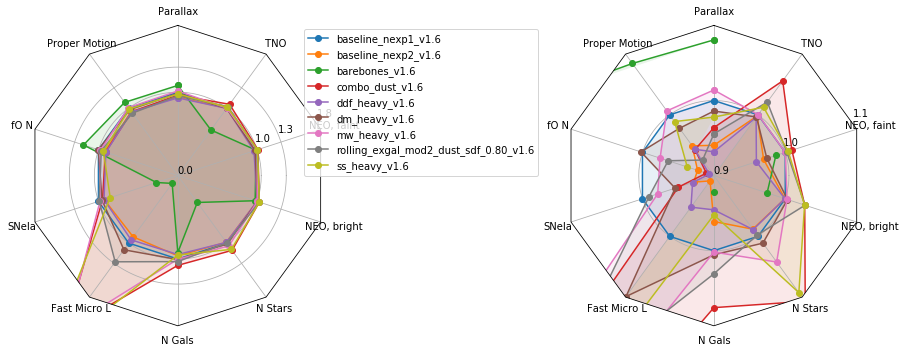

In [24]:
runs = ['baseline_nexp1_v1.6',
        'baseline_nexp2_v1.6',
        'barebones_v1.6',
 'combo_dust_v1.6',
 'ddf_heavy_v1.6',
 'dm_heavy_v1.6',
 'mw_heavy_v1.6',
 'rolling_exgal_mod2_dust_sdf_0.80_v1.6',
 'ss_heavy_v1.6']

data_normed = norm_df(data, runs, cols, norm_run='baseline_nexp1_v1.6',
                      invert_cols=['parallax_best18k', 'properMotion_best18k'])
data_normed = data_normed.rename(columns=name_mapper)

fig, ax = radar2(data_normed, legend=True, rgrids=[[0., 1.0, 1.3, 1.8], [0.9, 1.0, 1.1]])
fig.tight_layout()
fig.savefig('radar_plots/v16_radar.pdf')

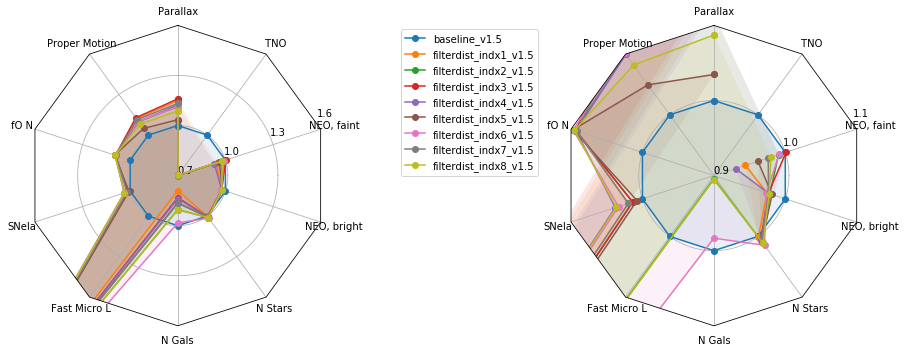

In [25]:
runs = ['baseline_v1.5', 'filterdist_indx1_v1.5',
 'filterdist_indx2_v1.5',
 'filterdist_indx3_v1.5',
 'filterdist_indx4_v1.5',
 'filterdist_indx5_v1.5',
 'filterdist_indx6_v1.5',
 'filterdist_indx7_v1.5',
 'filterdist_indx8_v1.5'
 ]

data_normed = norm_df(data, runs, cols, norm_run='baseline_v1.5',
                      invert_cols=['parallax_best18k', 'properMotion_best18k'])
data_normed = data_normed.rename(columns=name_mapper)

fig, ax = radar2(data_normed, legend=True)
fig.tight_layout()
fig.savefig('radar_plots/filter_dist_radar.pdf')

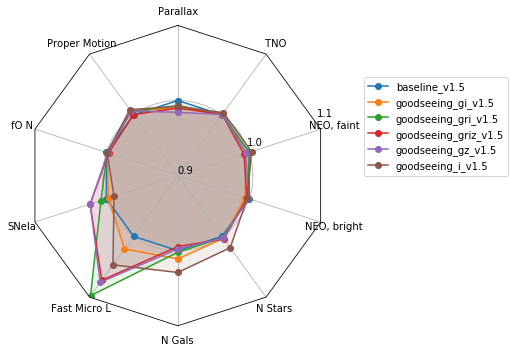

In [26]:
runs = ['baseline_v1.5', 
 'goodseeing_gi_v1.5',
 'goodseeing_gri_v1.5',
 'goodseeing_griz_v1.5',
 'goodseeing_gz_v1.5',
 'goodseeing_i_v1.5']

data_normed = norm_df(data, runs, cols, norm_run='baseline_v1.5',
                      invert_cols=['parallax_best18k', 'properMotion_best18k'])
data_normed = data_normed.rename(columns=name_mapper)

fig, ax = radar(data_normed, legend=True, rgrids=[0.9, 1.0, 1.1])
fig.tight_layout()
fig.savefig('radar_plots/goodseeing_radar.pdf')

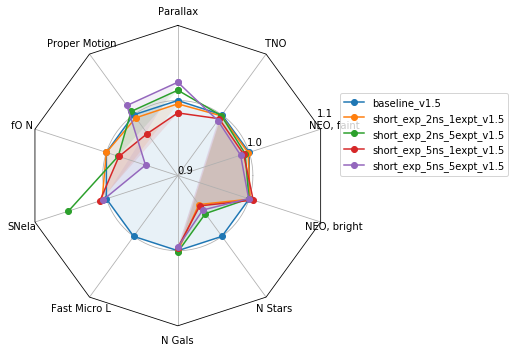

In [27]:
runs = ['baseline_v1.5', 
 'short_exp_2ns_1expt_v1.5',
 'short_exp_2ns_5expt_v1.5',
 'short_exp_5ns_1expt_v1.5',
 'short_exp_5ns_5expt_v1.5']

data_normed = norm_df(data, runs, cols, norm_run='baseline_v1.5',
                      invert_cols=['parallax_best18k', 'properMotion_best18k'])
data_normed = data_normed.rename(columns=name_mapper)

fig, ax = radar(data_normed, legend=True, rgrids=[0.9, 1.0, 1.1])
fig.tight_layout()
fig.savefig('radar_plots/shortexp_radar.pdf')

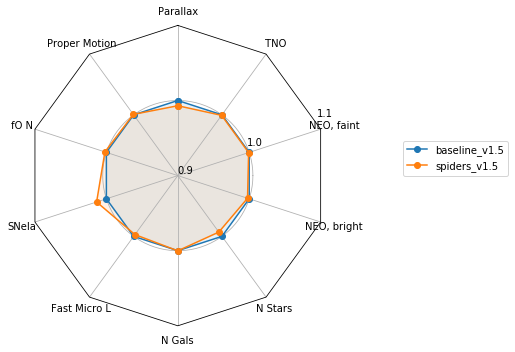

In [28]:
runs = ['baseline_v1.5', 
 'spiders_v1.5']
data_normed = norm_df(data, runs, cols, norm_run='baseline_v1.5',
                      invert_cols=['parallax_best18k', 'properMotion_best18k'])
data_normed = data_normed.rename(columns=name_mapper)

fig, ax = radar(data_normed, legend=True, rgrids=[0.9, 1.0, 1.1])
fig.tight_layout()
fig.savefig('radar_plots/spider_radar.pdf')

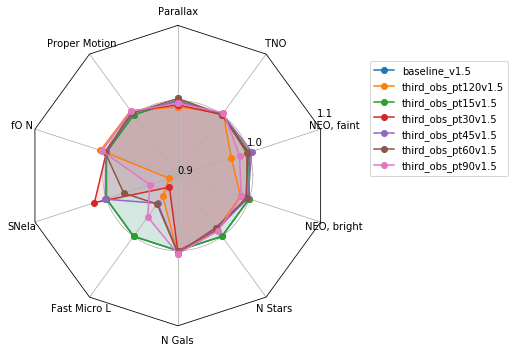

In [29]:
runs = ['baseline_v1.5', 
 'third_obs_pt120v1.5',
 'third_obs_pt15v1.5',
 'third_obs_pt30v1.5',
 'third_obs_pt45v1.5',
 'third_obs_pt60v1.5',
 'third_obs_pt90v1.5']
data_normed = norm_df(data, runs, cols, norm_run='baseline_v1.5',
                      invert_cols=['parallax_best18k', 'properMotion_best18k'])
data_normed = data_normed.rename(columns=name_mapper)

fig, ax = radar(data_normed, legend=True, rgrids=[0.9, 1.0, 1.1])
fig.tight_layout()
fig.savefig('radar_plots/third_radar.pdf')

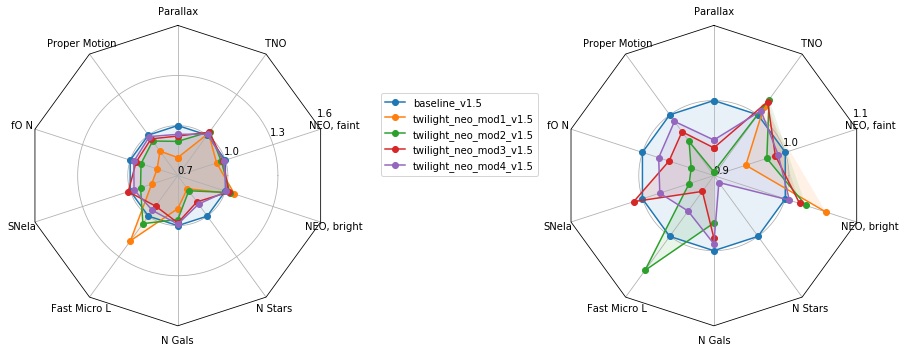

In [30]:
runs = ['baseline_v1.5', 
 'twilight_neo_mod1_v1.5',
 'twilight_neo_mod2_v1.5',
 'twilight_neo_mod3_v1.5',
 'twilight_neo_mod4_v1.5']
data_normed = norm_df(data, runs, cols, norm_run='baseline_v1.5',
                      invert_cols=['parallax_best18k', 'properMotion_best18k'])
data_normed = data_normed.rename(columns=name_mapper)

fig, ax = radar2(data_normed, legend=True)
fig.tight_layout()
fig.savefig('radar_plots/twineo_radar.pdf')

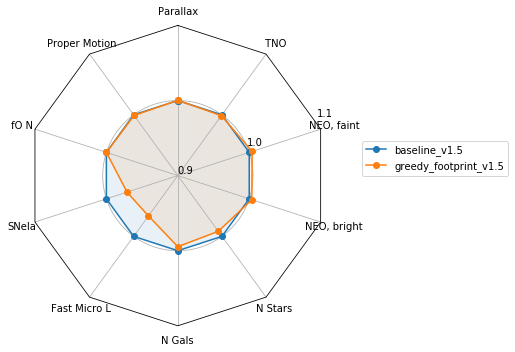

In [31]:
runs = ['baseline_v1.5', 
 'greedy_footprint_v1.5']
data_normed = norm_df(data, runs, cols, norm_run='baseline_v1.5',
                      invert_cols=['parallax_best18k', 'properMotion_best18k'])
data_normed = data_normed.rename(columns=name_mapper)

fig, ax = radar(data_normed, legend=True, rgrids=[0.9, 1.0, 1.1])
fig.tight_layout()
fig.savefig('radar_plots/greedy_radar.pdf')

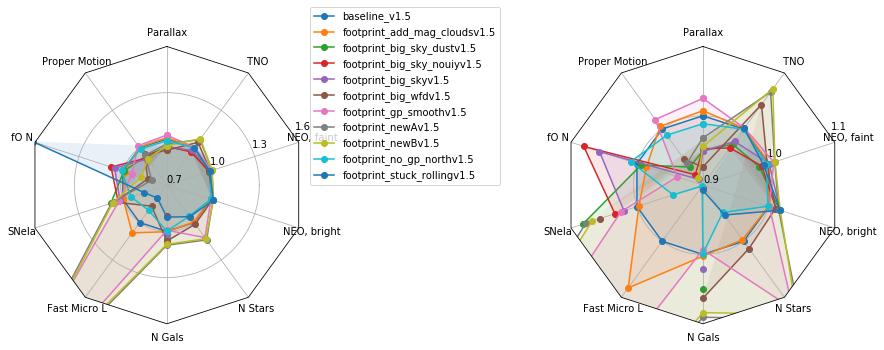

In [37]:
runs = ['baseline_v1.5', 'footprint_add_mag_cloudsv1.5',
 'footprint_big_sky_dustv1.5',
 'footprint_big_sky_nouiyv1.5',
 'footprint_big_skyv1.5',
 'footprint_big_wfdv1.5',
 'footprint_gp_smoothv1.5',
 'footprint_newAv1.5',
 'footprint_newBv1.5',
 'footprint_no_gp_northv1.5',
 'footprint_stuck_rollingv1.5',
 ]
data_normed = norm_df(data, runs, cols, norm_run='baseline_v1.5',
                      invert_cols=['parallax_best18k', 'properMotion_best18k'])
data_normed = data_normed.rename(columns=name_mapper)

fig, ax = radar2(data_normed, legend=True)
fig.tight_layout()
fig.savefig('radar_plots/footprints_radar.pdf')

In [33]:
[name for name in data['runName'] if 'footprint' in name]

['footprint_add_mag_cloudsv1.4',
 'footprint_big_sky_dustv1.4',
 'footprint_big_sky_nouiyv1.4',
 'footprint_big_skyv1.4',
 'footprint_big_wfdv1.4',
 'footprint_bluer_footprintv1.4',
 'footprint_gp_smoothv1.4',
 'footprint_newAv1.4',
 'footprint_newBv1.4',
 'footprint_no_gp_northv1.4',
 'footprint_standard_goalsv1.4',
 'footprint_stuck_rollingv1.4',
 'footprint_add_mag_cloudsv1.5',
 'footprint_big_sky_dustv1.5',
 'footprint_big_sky_nouiyv1.5',
 'footprint_big_skyv1.5',
 'footprint_big_wfdv1.5',
 'footprint_bluer_footprintv1.5',
 'footprint_gp_smoothv1.5',
 'footprint_newAv1.5',
 'footprint_newBv1.5',
 'footprint_no_gp_northv1.5',
 'footprint_standard_goalsv1.5',
 'footprint_stuck_rollingv1.5',
 'greedy_footprint_v1.5']